In [1]:
import ROOT as r
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/07


In [2]:
def get_bias(proc, val=1):
    
    df = pd.DataFrame()
    
    fname = 'bias{}'.format(mu)+proc+'.root'
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    
    val_ggF = 1
    val_VBF = 1
    if proc == "ggF":
        val_ggF = val
    if proc == "VBF":
        val_VBF = val
        
    print(val_ggF,val_VBF)
    
    vals_ggF = []
    vals_VBF = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        
        mu_ggF = rtree.trackedParam_rggF
        errmu_ggF = rtree.trackedError_rggF
        mu_VBF = rtree.trackedParam_rVBF
        errmu_VBF = rtree.trackedError_rVBF
        
        print(i,rtree.limit,mu_ggF,mu_VBF)
        
        #print(i, mu, errmu)
        if errmu_ggF != 0 and errmu_VBF !=0:
            vals_ggF.append((mu_ggF-val_ggF)/errmu_ggF)
            vals_VBF.append((mu_VBF-val_VBF)/errmu_VBF)
            
    df['rggF'] = vals_ggF
    df['rVBF'] = vals_VBF
            
    return df

In [3]:
def draw_bias(proc, mu):

    df = get_bias(proc, mu)
    x = np.linspace(-20, 20, 200)
    bins = np.linspace(-20, 20, 50)
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    
    val_ggF = 1
    val_VBF = 1
    if proc == "ggF":
        val_ggF = mu
    if proc == "VBF":
        val_VBF = mu

    # ggF
    goftoys_ggF = df['rggF'].values
    a, b = norm.fit(goftoys_ggF) 
    fi1 = ax[0].plot(
        x,
        norm(a).pdf(x) * len(goftoys_ggF) * (bins[1] - bins[0]),
        'k-',
        lw=2,
        color='blue', ls='--',
        label=r'$\bar{x}=$' + '{:.3f}\n'.format(a) + r'$\sigma_x=$' + '{:.3f}'.format(b),
    )
    hi1 = ax[0].hist(goftoys_ggF,
            histtype='step',
            bins=bins,
            lw=2,
            #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
            label='Toys\nN = {}'.format(len(goftoys_ggF)),
            color='black')

    ax[0].axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
    ax[0].axvline(a, ls='--', color='blue', alpha=1)

    l1 = ax[0].legend(title=r'$\mu(ggF)=${}'.format(val_ggF), loc=0)
    for t in l1.texts: t.set_multialignment('center');
    ax[0].set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
    ax[0].set_ylabel("Pseudoexperiments", ha='right', y=1)

    # VBF
    goftoys_VBF = df['rVBF'].values
    c, d = norm.fit(goftoys_VBF) 
    fi2 = ax[1].plot(
        x,
        norm(c).pdf(x) * len(goftoys_VBF) * (bins[1] - bins[0]),
        'k-',
        lw=2,
        color='blue', ls='--',
        label=r'$\bar{x}=$' + '{:.3f}\n'.format(c) + r'$\sigma_x=$' + '{:.3f}'.format(d),
    )
    hi2 = ax[1].hist(goftoys_VBF,
            histtype='step',
            bins=bins,
            lw=2,
            #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
            label='Toys\nN = {}'.format(len(goftoys_VBF)),
            color='black')

    ax[1].axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
    ax[1].axvline(c, ls='--', color='blue', alpha=1)

    l2 = ax[1].legend(title=r'$\mu(VBF)=${}'.format(val_VBF), loc=0)
    for t in l1.texts: t.set_multialignment('center');
    ax[1].set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
    ax[1].set_ylabel("Pseudoexperiments", ha='right', y=1)
    
    plt.show()

    fig.savefig('plots/single_bias_{}_{}.pdf'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')
    fig.savefig('plots/single_bias_{}_{}.png'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')

(0, 1)
(0, 4.161938640671536, 2.8319544792175293, 4.161938667297363)
(1, -1.6427130353345731, 2.8319544792175293, 4.161938667297363)
(2, 11.57427002487786, 2.8319544792175293, 4.161938667297363)
(3, 4.161938640671536, 2.8319544792175293, 4.161938667297363)
(4, 4.398100382568785, 2.3375754356384277, 4.39810037612915)
(5, -1.1788522500216896, 2.3375754356384277, 4.39810037612915)
(6, 12.047035363064095, 2.3375754356384277, 4.39810037612915)
(7, 4.398100382568785, 2.3375754356384277, 4.39810037612915)
(8, 8.56593375401718, -9.234580039978027, 8.565934181213379)
(9, 4.137957506295031, -9.234580039978027, 8.565934181213379)
(10, 14.57464081683363, -9.234580039978027, 8.565934181213379)
(11, 8.56593375401718, -9.234580039978027, 8.565934181213379)
(12, 0.2687509822848284, -0.9659103751182556, 0.26875099539756775)
(13, -3.6403759935917397, -0.9659103751182556, 0.26875099539756775)
(14, 4.231191176440063, -0.9659103751182556, 0.26875099539756775)
(15, 0.2687509822848284, -0.9659103751182556, 0

(143, -0.16860136262117464, 3.4599218368530273, -0.1686013638973236)
(144, 2.1358402211184284, 11.055562019348145, 2.1358401775360107)
(145, -4.5238083061394185, 11.055562019348145, 2.1358401775360107)
(146, 10.006705573514282, 11.055562019348145, 2.1358401775360107)
(147, 2.1358402211184284, 11.055562019348145, 2.1358401775360107)
(148, -1.1567006729535763, -0.750261664390564, -1.1567007303237915)
(149, -4.868228236144521, -0.750261664390564, -1.1567007303237915)
(150, 2.684717039129258, -0.750261664390564, -1.1567007303237915)
(151, -1.1567006729535763, -0.750261664390564, -1.1567007303237915)
(152, -1.3956710400449879, 9.837055206298828, -1.395671010017395)
(153, -5.804731103481545, 9.837055206298828, -1.395671010017395)
(154, 2.8965280754298517, 9.837055206298828, -1.395671010017395)
(155, -1.3956710400449879, 9.837055206298828, -1.395671010017395)
(156, 6.295928112930227, -3.176494836807251, 6.295928001403809)
(157, 1.5816088341036219, -3.176494836807251, 6.295928001403809)
(158, 

(1186, 3.640961230126269, 7.176396369934082, -1.3557074069976807)
(1187, -1.355707352409766, 7.176396369934082, -1.3557074069976807)
(1188, -2.502064126003205, 5.077295780181885, -2.5020642280578613)
(1189, -7.706034965366924, 5.077295780181885, -2.5020642280578613)
(1190, 3.0535179103564634, 5.077295780181885, -2.5020642280578613)
(1191, -2.502064126003205, 5.077295780181885, -2.5020642280578613)
(1192, 0.5733796711477481, -6.428081512451172, 0.5733796954154968)
(1193, -2.5571459641395875, -6.428081512451172, 0.5733796954154968)
(1194, 4.560244063802794, -6.428081512451172, 0.5733796954154968)
(1195, 0.5733796711477481, -6.428081512451172, 0.5733796954154968)
(1196, 5.62531215443218, 1.3042386770248413, 5.625312328338623)
(1197, 2.535752788689779, 1.3042386770248413, 5.625312328338623)
(1198, 9.93767999636487, 1.3042386770248413, 5.625312328338623)
(1199, 5.62531215443218, 1.3042386770248413, 5.625312328338623)
(1200, -0.4570218068497951, 0.30365845561027527, -0.4570218026638031)
(120

(2293, -1.2121244798885158, 0.15163132548332214, 2.4986836910247803)
(2294, 7.1603186935053555, 0.15163132548332214, 2.4986836910247803)
(2295, 2.498683768726906, 0.15163132548332214, 2.4986836910247803)
(2296, -0.057926899065577686, 2.6965203285217285, -0.05792690068483353)
(2297, -3.5585769845863253, 2.6965203285217285, -0.05792690068483353)
(2298, 4.052441522058474, 2.6965203285217285, -0.05792690068483353)
(2299, -0.057926899065577686, 2.6965203285217285, -0.05792690068483353)
(2300, -0.32493788696670833, -4.875555515289307, -0.3249378800392151)
(2301, -5.270370311850892, -4.875555515289307, -0.3249378800392151)
(2302, 5.571178850759192, -4.875555515289307, -0.3249378800392151)
(2303, -0.32493788696670833, -4.875555515289307, -0.3249378800392151)
(2304, -3.837405437013075, -2.722836971282959, -3.8374054431915283)
(2305, -6.724443549513084, -2.722836971282959, -3.8374054431915283)
(2306, -1.2682945356250013, -2.722836971282959, -3.8374054431915283)
(2307, -3.837405437013075, -2.7228

(3310, 9.380464208602149, 2.616363763809204, 4.698368549346924)
(3311, 4.698368391816814, 2.616363763809204, 4.698368549346924)
(3312, -0.6055235406944917, -2.1363368034362793, -0.6055235266685486)
(3313, -3.329765990771264, -2.1363368034362793, -0.6055235266685486)
(3314, 2.13754456985855, -2.1363368034362793, -0.6055235266685486)
(3315, -0.6055235406944917, -2.1363368034362793, -0.6055235266685486)
(3316, 3.3428302616293593, 0.17571087181568146, 3.342830181121826)
(3317, -1.4129886440078643, 0.17571087181568146, 3.342830181121826)
(3318, 9.376761643172205, 0.17571087181568146, 3.342830181121826)
(3319, 3.3428302616293593, 0.17571087181568146, 3.342830181121826)
(3320, -0.5983574450907838, 4.711132526397705, -0.5983574390411377)
(3321, -5.260328176106854, 4.711132526397705, -0.5983574390411377)
(3322, 4.526126464844741, 4.711132526397705, -0.5983574390411377)
(3323, -0.5983574450907838, 4.711132526397705, -0.5983574390411377)
(3324, -2.3556778282883784, 1.86491060256958, -2.3556778430

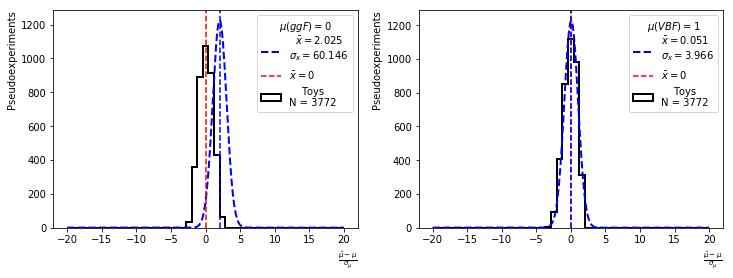

(1, 1)
(0, 3.5943334672574565, 5.236252307891846, 3.5943334102630615)
(1, -2.1578289755333735, 5.236252307891846, 3.5943334102630615)
(2, 10.80420522999517, 5.236252307891846, 3.5943334102630615)
(3, 3.5943334672574565, 5.236252307891846, 3.5943334102630615)
(4, -3.3193515434345926, 9.198827743530273, -3.3193514347076416)
(5, -8.498123967122954, 9.198827743530273, -3.3193514347076416)
(6, 1.6980671853597773, 9.198827743530273, -3.3193514347076416)
(7, -3.3193515434345926, 9.198827743530273, -3.3193514347076416)
(8, 1.7766905261067905, 0.9373820424079895, 1.7766904830932617)
(9, -1.6381381658880834, 0.9373820424079895, 1.7766904830932617)
(10, 5.934666361321906, 0.9373820424079895, 1.7766904830932617)
(11, 1.7766905261067905, 0.9373820424079895, 1.7766904830932617)
(12, 3.7019766608853217, -1.3944100141525269, 3.701976776123047)
(13, 0.36037675538077707, -1.3944100141525269, 3.701976776123047)
(14, 8.201224964034406, -1.3944100141525269, 3.701976776123047)
(15, 3.7019766608853217, -1.39

(949, 1.230193921966206, 3.126971483230591, 4.474794864654541)
(950, 8.869692382213954, 3.126971483230591, 4.474794864654541)
(951, 4.474794983711931, 3.126971483230591, 4.474794864654541)
(952, -0.5284897179537751, 5.95683479309082, -0.5284897089004517)
(953, -4.100374211130318, 5.95683479309082, -0.5284897089004517)
(954, 3.369753353941982, 5.95683479309082, -0.5284897089004517)
(955, -0.5284897179537751, 5.95683479309082, -0.5284897089004517)
(956, -0.3611165946422119, 4.755332946777344, -0.36111658811569214)
(957, -6.779155262407792, 4.755332946777344, -0.36111658811569214)
(958, 7.053567449890769, 4.755332946777344, -0.36111658811569214)
(959, -0.3611165946422119, 4.755332946777344, -0.36111658811569214)
(960, -2.032291749029824, 0.782698929309845, -2.0322916507720947)
(961, -5.636482213107288, 0.782698929309845, -2.0322916507720947)
(962, 1.566929656355204, 0.782698929309845, -2.0322916507720947)
(963, -2.032291749029824, 0.782698929309845, -2.0322916507720947)
(964, 10.444220243

(2084, 1.0277435659409804, 0.23197297751903534, 1.0277435779571533)
(2085, -2.8782538709706396, 0.23197297751903534, 1.0277435779571533)
(2086, 5.3394660613459415, 0.23197297751903534, 1.0277435779571533)
(2087, 1.0277435659409804, 0.23197297751903534, 1.0277435779571533)
(2088, 3.1570375579103427, -0.4374569356441498, 3.1570374965667725)
(2089, 0.01508424898817129, -0.4374569356441498, 3.1570374965667725)
(2090, 7.48065008546094, -0.4374569356441498, 3.1570374965667725)
(2091, 3.1570375579103427, -0.4374569356441498, 3.1570374965667725)
(2092, 3.8828616341094033, -3.4054505825042725, 3.882861614227295)
(2093, -0.6424135742721759, -3.4054505825042725, 3.882861614227295)
(2094, 9.424540454495217, -3.4054505825042725, 3.882861614227295)
(2095, 3.8828616341094033, -3.4054505825042725, 3.882861614227295)
(2096, 0.7847061616398605, -0.05997461453080177, 0.784706175327301)
(2097, -0.725335004518102, -0.05997461453080177, 0.784706175327301)
(2098, 2.613283389594226, -0.05997461453080177, 0.78

(3069, 1.0416434736597058, 3.5096540451049805, 3.9229989051818848)
(3070, 7.725801749935811, 3.5096540451049805, 3.9229989051818848)
(3071, 3.9229989314510476, 3.5096540451049805, 3.9229989051818848)
(3072, 3.738329973398052, 10.806146621704102, 3.7383298873901367)
(3073, -1.4671256852770505, 10.806146621704102, 3.7383298873901367)
(3074, 10.251150522805998, 10.806146621704102, 3.7383298873901367)
(3075, 3.738329973398052, 10.806146621704102, 3.7383298873901367)
(3076, 6.897914231217996, -3.558847427368164, 6.897914409637451)
(3077, 3.113751080132775, -3.558847427368164, 6.897914409637451)
(3078, 11.9060788081088, -3.558847427368164, 6.897914409637451)
(3079, 6.897914231217996, -3.558847427368164, 6.897914409637451)
(3080, 0.28791749956207013, 1.572385549545288, 0.28791749477386475)
(3081, -2.2917671270476823, 1.572385549545288, 0.28791749477386475)
(3082, 3.4371972710985994, 1.572385549545288, 0.28791749477386475)
(3083, 0.28791749956207013, 1.572385549545288, 0.28791749477386475)
(30

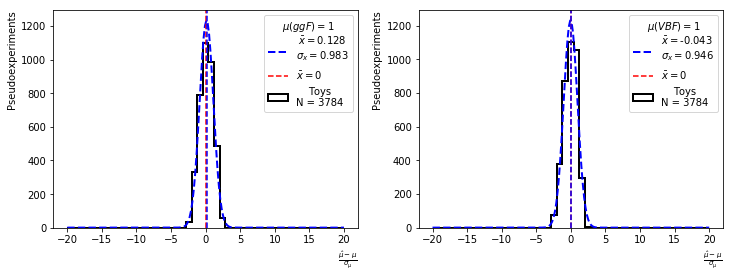

(5, 1)
(0, -6.252589632353477, 13.808477401733398, -6.252589702606201)
(1, -12.78230052583728, 13.808477401733398, -6.252589702606201)
(2, -0.05883897880168654, 13.808477401733398, -6.252589702606201)
(3, -6.252589632353477, 13.808477401733398, -6.252589702606201)
(4, 1.4717346686383053, 17.79963493347168, 1.471734642982483)
(5, -3.230470735554343, 17.79963493347168, 1.471734642982483)
(6, 7.145221203384, 17.79963493347168, 1.471734642982483)
(7, 1.4717346686383053, 17.79963493347168, 1.471734642982483)
(8, 1.8128016879689994, 5.863318920135498, 1.812801718711853)
(9, -1.0756646883997805, 5.863318920135498, 1.812801718711853)
(10, 5.375035647825896, 5.863318920135498, 1.812801718711853)
(11, 1.8128016879689994, 5.863318920135498, 1.812801718711853)
(12, 4.609080387067067, 5.992905139923096, 4.6090803146362305)
(13, 1.5000969508792767, 5.992905139923096, 4.6090803146362305)
(14, 8.733677505410245, 5.992905139923096, 4.6090803146362305)
(15, 4.609080387067067, 5.992905139923096, 4.609080

(1016, -4.478218348644717, 3.6198086738586426, -4.4782185554504395)
(1017, -7.857519286017104, 3.6198086738586426, -4.4782185554504395)
(1018, -1.5494077912603212, 3.6198086738586426, -4.4782185554504395)
(1019, -4.478218348644717, 3.6198086738586426, -4.4782185554504395)
(1020, 3.903618098153899, 0.9119362235069275, 3.903618097305298)
(1021, 0.5850878079306083, 0.9119362235069275, 3.903618097305298)
(1022, 8.1295278598157, 0.9119362235069275, 3.903618097305298)
(1023, 3.903618098153899, 0.9119362235069275, 3.903618097305298)
(1024, -1.947229896182634, 7.623842716217041, -1.9472298622131348)
(1025, -5.287624496604243, 7.623842716217041, -1.9472298622131348)
(1026, 1.3282404643774988, 7.623842716217041, -1.9472298622131348)
(1027, -1.947229896182634, 7.623842716217041, -1.9472298622131348)
(1028, 0.9424270595421547, 3.642331123352051, 0.9424270391464233)
(1029, -3.7123488915634884, 3.642331123352051, 0.9424270391464233)
(1030, 5.96161841330168, 3.642331123352051, 0.9424270391464233)
(10

(2138, 8.254519926649543, 6.184610843658447, 2.214162826538086)
(2139, 2.2141628026590467, 6.184610843658447, 2.214162826538086)
(2140, 3.3651776132107614, 7.400211811065674, 3.365177631378174)
(2141, -1.8497415732430902, 7.400211811065674, 3.365177631378174)
(2142, 9.517013226238864, 7.400211811065674, 3.365177631378174)
(2143, 3.3651776132107614, 7.400211811065674, 3.365177631378174)
(2144, 8.973801137994286, -1.280001163482666, 8.973801612854004)
(2145, 3.9966132691992016, -1.280001163482666, 8.973801612854004)
(2146, 15.886124380832486, -1.280001163482666, 8.973801612854004)
(2147, 8.973801137994286, -1.280001163482666, 8.973801612854004)
(2148, 1.6489803165167416, 7.108216762542725, 1.6489802598953247)
(2149, -1.442223642274909, 7.108216762542725, 1.6489802598953247)
(2150, 5.496163049396776, 7.108216762542725, 1.6489802598953247)
(2151, 1.6489803165167416, 7.108216762542725, 1.6489802598953247)
(2152, 1.8092223113372654, -4.403311729431152, 1.8092223405838013)
(2153, -1.277133230

(3140, -3.6169776728745973, 17.995969772338867, -3.6169776916503906)
(3141, -8.81266791265157, 17.995969772338867, -3.6169776916503906)
(3142, 0.7288803080423962, 17.995969772338867, -3.6169776916503906)
(3143, -3.6169776728745973, 17.995969772338867, -3.6169776916503906)
(3144, 1.1128105753911939, 8.4766263961792, 1.1128106117248535)
(3145, -5.234201890852886, 8.4766263961792, 1.1128106117248535)
(3146, 8.370161643540222, 8.4766263961792, 1.1128106117248535)
(3147, 1.1128105753911939, 8.4766263961792, 1.1128106117248535)
(3148, -5.871921149651001, 13.531490325927734, -5.871921062469482)
(3149, -10.687895105193448, 13.531490325927734, -5.871921062469482)
(3150, -2.6392218222871073, 13.531490325927734, -5.871921062469482)
(3151, -5.871921149651001, 13.531490325927734, -5.871921062469482)
(3152, -0.5288913167720892, 5.6139421463012695, -0.5288913249969482)
(3153, -3.507133054828303, 5.6139421463012695, -0.5288913249969482)
(3154, 2.5401151672511975, 5.6139421463012695, -0.528891324996948

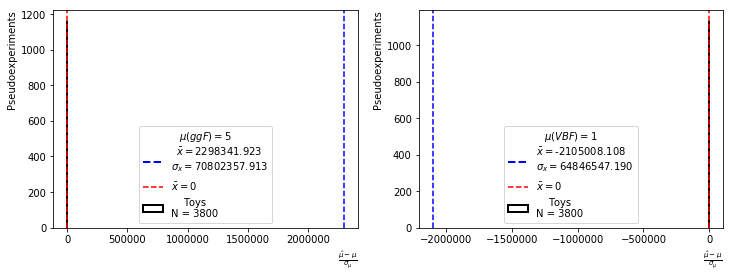

(10, 1)
(0, 8.654017418909831, 18.2728271484375, 8.654017448425293)
(1, 1.6575997769757977, 18.2728271484375, 8.654017448425293)
(2, 18.429957414098133, 18.2728271484375, 8.654017448425293)
(3, 8.654017418909831, 18.2728271484375, 8.654017448425293)
(4, -8.156466694433036, 30.4287109375, -8.156466484069824)
(5, -14.356151504869286, 30.4287109375, -8.156466484069824)
(6, -2.657129575853512, 30.4287109375, -8.156466484069824)
(7, -8.156466694433036, 30.4287109375, -8.156466484069824)
(8, 4.872391666034133, 9.347696304321289, 4.872391700744629)
(9, 1.4906883512762068, 9.347696304321289, 4.872391700744629)
(10, 9.16754282981687, 9.347696304321289, 4.872391700744629)
(11, 4.872391666034133, 9.347696304321289, 4.872391700744629)
(12, 2.743669605480264, 9.106657028198242, 2.7436695098876953)
(13, -0.5868874826756558, 9.106657028198242, 2.7436695098876953)
(14, 6.844657958137088, 9.106657028198242, 2.7436695098876953)
(15, 2.743669605480264, 9.106657028198242, 2.7436695098876953)
(16, -4.86254

(1087, -3.7082135584818445, 11.29991340637207, -3.7082135677337646)
(1088, -2.7508597536288875, 24.135908126831055, -2.7508597373962402)
(1089, -9.277563019832922, 24.135908126831055, -2.7508597373962402)
(1090, 4.067236049931139, 24.135908126831055, -2.7508597373962402)
(1091, -2.7508597536288875, 24.135908126831055, -2.7508597373962402)
(1092, -2.020831071206345, 13.11715030670166, -2.0208311080932617)
(1093, -5.6161252297999935, 13.11715030670166, -2.0208311080932617)
(1094, 1.2814843193104402, 13.11715030670166, -2.0208311080932617)
(1095, -2.020831071206345, 13.11715030670166, -2.0208311080932617)
(1096, 1.6750651205450708, 10.835233688354492, 1.6750651597976685)
(1097, -1.659308274609649, 10.835233688354492, 1.6750651597976685)
(1098, 5.37699610467035, 10.835233688354492, 1.6750651597976685)
(1099, 1.6750651205450708, 10.835233688354492, 1.6750651597976685)
(1100, 1.9699078084157264, 15.238594055175781, 1.9699077606201172)
(1101, -4.305455857784578, 15.238594055175781, 1.96990776

(2086, 2.012712831089552, 12.607497215270996, -1.6425257921218872)
(2087, -1.6425257878675268, 12.607497215270996, -1.6425257921218872)
(2088, 8.03718081093399, 1.5348457098007202, 8.03718090057373)
(2089, 3.2119600041280627, 1.5348457098007202, 8.03718090057373)
(2090, 14.725399508899125, 1.5348457098007202, 8.03718090057373)
(2091, 8.03718081093399, 1.5348457098007202, 8.03718090057373)
(2092, -0.90990837691416, 11.960795402526855, -0.9099083542823792)
(2093, -4.008922208690559, 11.960795402526855, -0.9099083542823792)
(2094, 1.977029657723361, 11.960795402526855, -0.9099083542823792)
(2095, -0.90990837691416, 11.960795402526855, -0.9099083542823792)
(2096, 3.5382074862815927, 12.882915496826172, 3.538207530975342)
(2097, 0.036110275532123204, 12.882915496826172, 3.538207530975342)
(2098, 7.855945688874079, 12.882915496826172, 3.538207530975342)
(2099, 3.5382074862815927, 12.882915496826172, 3.538207530975342)
(2100, 1.7080101649744108, 13.482537269592285, 1.708010196685791)
(2101, -

(3086, 8.5658041528796, 7.093026638031006, 3.770059108734131)
(3087, 3.7700591382651822, 7.093026638031006, 3.770059108734131)
(3088, 4.7217298025482535, 10.623247146606445, 4.721729755401611)
(3089, 0.8997853489159433, 10.623247146606445, 4.721729755401611)
(3090, 9.809517881972974, 10.623247146606445, 4.721729755401611)
(3091, 4.7217298025482535, 10.623247146606445, 4.721729755401611)
(3092, 1.178038935361883, 17.36934471130371, 1.1780389547348022)
(3093, -2.586723754034742, 17.36934471130371, 1.1780389547348022)
(3094, 5.373340772518483, 17.36934471130371, 1.1780389547348022)
(3095, 1.178038935361883, 17.36934471130371, 1.1780389547348022)
(3096, 1.1456659939714768, 12.998366355895996, 1.1456660032272339)
(3097, -3.441898385122852, 12.998366355895996, 1.1456660032272339)
(3098, 5.992183565508982, 12.998366355895996, 1.1456660032272339)
(3099, 1.1456659939714768, 12.998366355895996, 1.1456660032272339)
(3100, 2.267080286478489, 12.229979515075684, 2.267080307006836)
(3101, -2.1974380

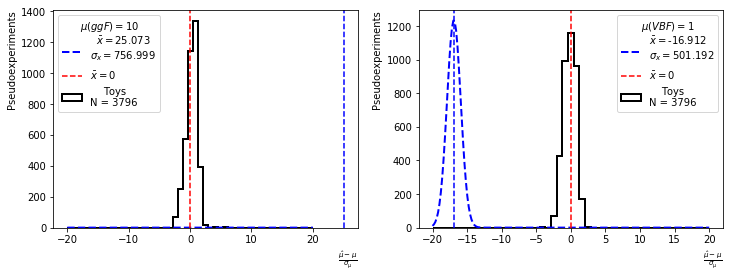

(15, 1)
(0, 5.953107323827794, 28.279624938964844, 5.9531073570251465)
(1, -0.585572554332046, 28.279624938964844, 5.9531073570251465)
(2, 14.67125226708973, 28.279624938964844, 5.9531073570251465)
(3, 5.953107323827794, 28.279624938964844, 5.9531073570251465)
(4, -7.035766459126947, 37.69468688964844, -7.0357666015625)
(5, -13.136020261525804, 37.69468688964844, -7.0357666015625)
(6, -1.215211057174825, 37.69468688964844, -7.0357666015625)
(7, -7.035766459126947, 37.69468688964844, -7.0357666015625)
(8, -0.6426400548157858, 16.041452407836914, -0.6426400542259216)
(9, -4.87552665726584, 16.041452407836914, -0.6426400542259216)
(10, 3.0004778932907183, 16.041452407836914, -0.6426400542259216)
(11, -0.6426400548157858, 16.041452407836914, -0.6426400542259216)
(12, -6.42479402072, 25.332019805908203, -6.4247941970825195)
(13, -18.82385520623147, 25.332019805908203, -6.4247941970825195)
(14, 1.6301041793922337, 25.332019805908203, -6.4247941970825195)
(15, -6.42479402072, 25.3320198059082

(1091, -4.261824564277049, 16.689767837524414, -4.261824607849121)
(1092, 0.9940833628511143, 13.605353355407715, 0.9940833449363708)
(1093, -3.429947466405939, 13.605353355407715, 0.9940833449363708)
(1094, 4.879194146910205, 13.605353355407715, 0.9940833449363708)
(1095, 0.9940833628511143, 13.605353355407715, 0.9940833449363708)
(1096, 0.8902438486977786, 13.457255363464355, 0.8902438282966614)
(1097, -5.2543017568331605, 13.457255363464355, 0.8902438282966614)
(1098, 8.526376532986946, 13.457255363464355, 0.8902438282966614)
(1099, 0.8902438486977786, 13.457255363464355, 0.8902438282966614)
(1100, -5.708355788516272, 21.99576187133789, -5.708355903625488)
(1101, -11.691102164227697, 21.99576187133789, -5.708355903625488)
(1102, -1.7202075357196245, 21.99576187133789, -5.708355903625488)
(1103, -5.708355788516272, 21.99576187133789, -5.708355903625488)
(1104, 1.1954543301618799, 19.630746841430664, 1.1954543590545654)
(1105, -4.282415835365015, 19.630746841430664, 1.1954543590545654

(2103, 1.6378567165285176, 15.867374420166016, 1.6378567218780518)
(2104, 1.1441520236856064, 13.218780517578125, 1.144152045249939)
(2105, -7.305573309692056, 13.218780517578125, 1.144152045249939)
(2106, 10.457670358668807, 13.218780517578125, 1.144152045249939)
(2107, 1.1441520236856064, 13.218780517578125, 1.144152045249939)
(2108, -0.08065778172232285, 20.5274715423584, -0.08065778017044067)
(2109, -4.104817698455675, 20.5274715423584, -0.08065778017044067)
(2110, 3.918420440961444, 20.5274715423584, -0.08065778017044067)
(2111, -0.08065778172232285, 20.5274715423584, -0.08065778017044067)
(2112, 6.145553912200995, 14.768975257873535, 6.145554065704346)
(2113, 1.2798837537509122, 14.768975257873535, 6.145554065704346)
(2114, 12.596199382004212, 14.768975257873535, 6.145554065704346)
(2115, 6.145553912200995, 14.768975257873535, 6.145554065704346)
(2116, -0.773357189296533, 15.482990264892578, -0.7733572125434875)
(2117, -5.086185861241345, 15.482990264892578, -0.7733572125434875)


(3063, -2.697852140858629, 12.764404296875, -2.69785213470459)
(3064, 2.4693471213776945, 15.759621620178223, 2.4693472385406494)
(3065, -2.060005844667872, 15.759621620178223, 2.4693472385406494)
(3066, 7.889613698209387, 15.759621620178223, 2.4693472385406494)
(3067, 2.4693471213776945, 15.759621620178223, 2.4693472385406494)
(3068, 0.30238360036210565, 16.424230575561523, 0.3023836016654968)
(3069, -3.7790380752945367, 16.424230575561523, 0.3023836016654968)
(3070, 3.9340055773746867, 16.424230575561523, 0.3023836016654968)
(3071, 0.30238360036210565, 16.424230575561523, 0.3023836016654968)
(3072, -4.0900505723798375, 18.455928802490234, -4.09005069732666)
(3073, -8.548138199344065, 18.455928802490234, -4.09005069732666)
(3074, -0.6660459764993054, 18.455928802490234, -4.09005069732666)
(3075, -4.0900505723798375, 18.455928802490234, -4.09005069732666)
(3076, 0.44870315797638227, 14.43565559387207, 0.44870316982269287)
(3077, -5.174067161989014, 14.43565559387207, 0.4487031698226928

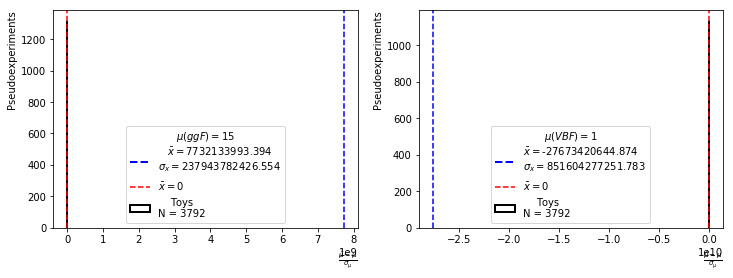

(20, 1)
(0, -0.6252838247955168, 37.330108642578125, -0.6252838373184204)
(1, -8.632658075254863, 37.330108642578125, -0.6252838373184204)
(2, 7.031503356875381, 37.330108642578125, -0.6252838373184204)
(3, -0.6252838247955168, 37.330108642578125, -0.6252838373184204)
(4, -6.675506288836644, 40.85281753540039, -6.675506114959717)
(5, -11.940791782894095, 40.85281753540039, -6.675506114959717)
(6, -2.1227474820911674, 40.85281753540039, -6.675506114959717)
(7, -6.675506288836644, 40.85281753540039, -6.675506114959717)
(8, 4.002759683581218, 13.255352020263672, 4.0027594566345215)
(9, 0.09027118636418319, 13.255352020263672, 4.0027594566345215)
(10, 8.612940728962993, 13.255352020263672, 4.0027594566345215)
(11, 4.002759683581218, 13.255352020263672, 4.0027594566345215)
(12, 2.306924645880599, 24.956117630004883, 2.30692458152771)
(13, -2.3121044960947694, 24.956117630004883, 2.30692458152771)
(14, 7.067178398263452, 24.956117630004883, 2.30692458152771)
(15, 2.306924645880599, 24.956117

(1093, -15.344104034312464, 29.06952667236328, -6.477631568908691)
(1094, 0.0670171895313425, 29.06952667236328, -6.477631568908691)
(1095, -6.477631628997585, 29.06952667236328, -6.477631568908691)
(1096, -0.5218197397572624, 27.2296142578125, -0.5218197107315063)
(1097, -6.109483158126438, 27.2296142578125, -0.5218197107315063)
(1098, 3.9293522809033323, 27.2296142578125, -0.5218197107315063)
(1099, -0.5218197397572624, 27.2296142578125, -0.5218197107315063)
(1100, 2.9778562798483676, 15.849588394165039, 2.977856397628784)
(1101, -1.540704301275639, 15.849588394165039, 2.977856397628784)
(1102, 8.59600779707387, 15.849588394165039, 2.977856397628784)
(1103, 2.9778562798483676, 15.849588394165039, 2.977856397628784)
(1104, 4.856187963066034, 24.647018432617188, 4.85618782043457)
(1105, -2.2122525578487924, 24.647018432617188, 4.85618782043457)
(1106, 11.769352086023364, 24.647018432617188, 4.85618782043457)
(1107, 4.856187963066034, 24.647018432617188, 4.85618782043457)
(1108, 4.45566

(2053, -7.239380797686205, 20.721952438354492, -3.9679617881774902)
(2054, -1.4414338489422054, 20.721952438354492, -3.9679617881774902)
(2055, -3.967961772799015, 20.721952438354492, -3.9679617881774902)
(2056, -2.172756944693532, 33.54181671142578, -2.1727569103240967)
(2057, -7.859097701932645, 33.54181671142578, -2.1727569103240967)
(2058, 2.242627097822627, 33.54181671142578, -2.1727569103240967)
(2059, -2.172756944693532, 33.54181671142578, -2.1727569103240967)
(2060, -1.6946888972143341, 20.665706634521484, -1.6946889162063599)
(2061, -7.045442034566733, 20.665706634521484, -1.6946889162063599)
(2062, 2.6534350622100646, 20.665706634521484, -1.6946889162063599)
(2063, -1.6946888972143341, 20.665706634521484, -1.6946889162063599)
(2064, -2.5298498779192755, 19.42630386352539, -2.5298497676849365)
(2065, -6.985799043754002, 19.42630386352539, -2.5298497676849365)
(2066, 1.2072804602641578, 19.42630386352539, -2.5298497676849365)
(2067, -2.5298498779192755, 19.42630386352539, -2.52

(3063, 0.9863937343147882, 28.48580551147461, 0.9863937497138977)
(3064, -4.419132219347148, 30.692138671875, -4.419132232666016)
(3065, -10.052632475920333, 30.692138671875, -4.419132232666016)
(3066, -0.17763525695237892, 30.692138671875, -4.419132232666016)
(3067, -4.419132219347148, 30.692138671875, -4.419132232666016)
(3068, 2.643482655086359, 10.053726196289062, 2.6434826850891113)
(3069, -0.3665580973091904, 10.053726196289062, 2.6434826850891113)
(3070, 5.852859178184224, 10.053726196289062, 2.6434826850891113)
(3071, 2.643482655086359, 10.053726196289062, 2.6434826850891113)
(3072, -2.420427954372826, 14.063338279724121, -2.4204280376434326)
(3073, -6.172922187621001, 14.063338279724121, -2.4204280376434326)
(3074, 1.42137803020259, 14.063338279724121, -2.4204280376434326)
(3075, -2.420427954372826, 14.063338279724121, -2.4204280376434326)
(3076, 3.5944555960493147, 17.47557258605957, 3.5944554805755615)
(3077, -1.0783074782315492, 17.47557258605957, 3.5944554805755615)
(3078,

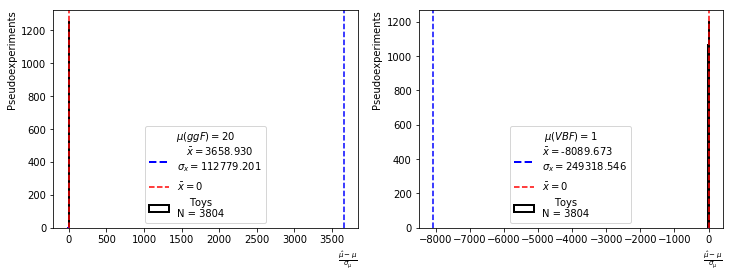

(25, 1)
(0, 3.5735291857178737, 43.213096618652344, 3.5735292434692383)
(1, -2.9357675940006924, 43.213096618652344, 3.5735292434692383)
(2, 11.480127263303602, 43.213096618652344, 3.5735292434692383)
(3, 3.5735291857178737, 43.213096618652344, 3.5735292434692383)
(4, -4.019932079512216, 35.8983039855957, -4.019932270050049)
(5, -9.694865581485077, 35.8983039855957, -4.019932270050049)
(6, 1.2815382518405087, 35.8983039855957, -4.019932270050049)
(7, -4.019932079512216, 35.8983039855957, -4.019932270050049)
(8, 1.0422202285430586, 24.304729461669922, 1.0422202348709106)
(9, -2.482365753942619, 24.304729461669922, 1.0422202348709106)
(10, 4.772595020566638, 24.304729461669922, 1.0422202348709106)
(11, 1.0422202285430586, 24.304729461669922, 1.0422202348709106)
(12, 0.33652055348132137, 30.56708526611328, 0.33652055263519287)
(13, -4.878192951076598, 30.56708526611328, 0.33652055263519287)
(14, 4.951793833294546, 30.56708526611328, 0.33652055263519287)
(15, 0.33652055348132137, 30.567085

(1178, 7.056471688129805, 26.170574188232422, 2.598677396774292)
(1179, 2.598677343945482, 26.170574188232422, 2.598677396774292)
(1180, 2.3869774602867153, 17.255638122558594, 2.386977434158325)
(1181, -1.8334451515993777, 17.255638122558594, 2.386977434158325)
(1182, 7.1479640988599265, 17.255638122558594, 2.386977434158325)
(1183, 2.3869774602867153, 17.255638122558594, 2.386977434158325)
(1184, -0.09314808265440888, 27.01923942565918, -0.09314808249473572)
(1185, -8.170277294248825, 27.01923942565918, -0.09314808249473572)
(1186, 5.975964418631987, 27.01923942565918, -0.09314808249473572)
(1187, -0.09314808265440888, 27.01923942565918, -0.09314808249473572)
(1188, 0.9968769450801318, 37.1594352722168, 0.9968769550323486)
(1189, -3.261285753506396, 37.1594352722168, 0.9968769550323486)
(1190, 5.03517284404412, 37.1594352722168, 0.9968769550323486)
(1191, 0.9968769450801318, 37.1594352722168, 0.9968769550323486)
(1192, 11.018758761123237, 13.557901382446289, 11.018758773803711)
(1193

(2178, -0.7961425049999944, 40.42578887939453, -5.533231735229492)
(2179, -5.533231636007812, 40.42578887939453, -5.533231735229492)
(2180, -2.3000037972855125, 15.196949005126953, -2.30000376701355)
(2181, -7.892684473653626, 15.196949005126953, -2.30000376701355)
(2182, 3.135389468267162, 15.196949005126953, -2.30000376701355)
(2183, -2.3000037972855125, 15.196949005126953, -2.30000376701355)
(2184, 3.133137892196089, 22.686891555786133, 3.1331379413604736)
(2185, -1.5415436065802357, 22.686891555786133, 3.1331379413604736)
(2186, 8.172135737352825, 22.686891555786133, 3.1331379413604736)
(2187, 3.133137892196089, 22.686891555786133, 3.1331379413604736)
(2188, 3.7639864446165774, 15.359789848327637, 3.763986349105835)
(2189, -0.23950425178332324, 15.359789848327637, 3.763986349105835)
(2190, 8.824653194120497, 15.359789848327637, 3.763986349105835)
(2191, 3.7639864446165774, 15.359789848327637, 3.763986349105835)
(2192, 9.641705872906286, 17.761356353759766, 9.641705513000488)
(2193,

(3177, -38.72546735742151, 38.23241424560547, -25.157018661499023)
(3178, -14.510671681676849, 38.23241424560547, -25.157018661499023)
(3179, -25.157019316205776, 38.23241424560547, -25.157018661499023)
(3180, 0.8176394356908361, 24.681312561035156, 0.8176394104957581)
(3181, -100.0, 24.681312561035156, 0.8176394104957581)
(3182, 100.0, 24.681312561035156, 0.8176394104957581)
(3183, 0.8176394356908361, 24.681312561035156, 0.8176394104957581)
(3184, 5.441944631006862, 16.238019943237305, 5.441944599151611)
(3185, -2.2886525450455206, 16.238019943237305, 5.441944599151611)
(3186, 15.644942415490881, 16.238019943237305, 5.441944599151611)
(3187, 5.441944631006862, 16.238019943237305, 5.441944599151611)
(3188, 0.5265647575388215, 24.285451889038086, 0.5265647768974304)
(3189, -7.001342811575372, 24.285451889038086, 0.5265647768974304)
(3190, 6.564906358560534, 24.285451889038086, 0.5265647768974304)
(3191, 0.5265647575388215, 24.285451889038086, 0.5265647768974304)
(3192, -2.38675445459533

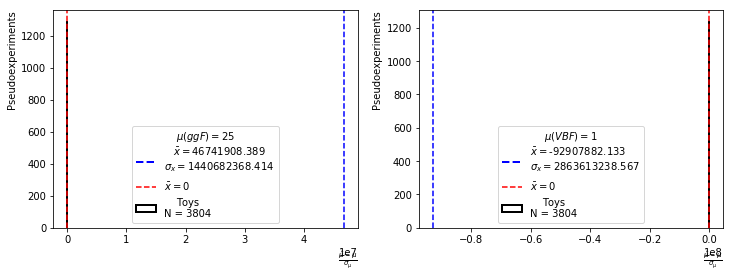

In [4]:
proc = "ggF"
for mu in [0,1,5,10,15,20,25]:
    draw_bias(proc,mu)

(1, 0)
(0, 3.6814796162595087, 4.9261040687561035, 3.6814796924591064)
(1, -2.07120273842901, 4.9261040687561035, 3.6814796924591064)
(2, 10.908279090168037, 4.9261040687561035, 3.6814796924591064)
(3, 3.6814796162595087, 4.9261040687561035, 3.6814796924591064)
(4, -0.40747788940771557, 0.8328468799591064, -0.40747788548469543)
(5, -4.862789268983027, 0.8328468799591064, -0.40747788548469543)
(6, 4.680386016952097, 0.8328468799591064, -0.40747788548469543)
(7, -0.40747788940771557, 0.8328468799591064, -0.40747788548469543)
(8, 1.7602228466996763, 0.6026225090026855, 1.7602227926254272)
(9, -1.5384563305247942, 0.6026225090026855, 1.7602227926254272)
(10, 5.82452447684885, 0.6026225090026855, 1.7602227926254272)
(11, 1.7602228466996763, 0.6026225090026855, 1.7602227926254272)
(12, -4.332218707936022, 1.2252140045166016, -4.332218647003174)
(13, -7.680016008401504, 1.2252140045166016, -4.332218647003174)
(14, -1.2723947151679602, 1.2252140045166016, -4.332218647003174)
(15, -4.3322187079

(916, -5.734588182032695, 7.877138614654541, -5.734588146209717)
(917, -9.903353937187516, 7.877138614654541, -5.734588146209717)
(918, -2.3300410724790654, 7.877138614654541, -5.734588146209717)
(919, -5.734588182032695, 7.877138614654541, -5.734588146209717)
(920, 1.325744217489742, 7.176210880279541, 1.3257442712783813)
(921, -2.387156235473437, 7.176210880279541, 1.3257442712783813)
(922, 5.745020401063906, 7.176210880279541, 1.3257442712783813)
(923, 1.325744217489742, 7.176210880279541, 1.3257442712783813)
(924, -1.0913459419990659, -7.5002288818359375, -1.0913459062576294)
(925, -4.752100630540247, -7.5002288818359375, -1.0913459062576294)
(926, 2.7924115502473272, -7.5002288818359375, -1.0913459062576294)
(927, -1.0913459419990659, -7.5002288818359375, -1.0913459062576294)
(928, -4.545646562072477, 12.512045860290527, -4.545646667480469)
(929, -9.454909938606184, 12.512045860290527, -4.545646667480469)
(930, 0.03421465733873941, 12.512045860290527, -4.545646667480469)
(931, -4.

(2038, 1.124091099963557, -1.0089572668075562, -2.2520549297332764)
(2039, -2.2520549289863965, -1.0089572668075562, -2.2520549297332764)
(2040, 0.9695104560131398, 0.08674214035272598, 0.9695104360580444)
(2041, -1.6844340070132442, 0.08674214035272598, 0.9695104360580444)
(2042, 4.017122026563157, 0.08674214035272598, 0.9695104360580444)
(2043, 0.9695104560131398, 0.08674214035272598, 0.9695104360580444)
(2044, 2.5226486497923872, 1.6087958812713623, 2.522648572921753)
(2045, -1.0959525150708895, 1.6087958812713623, 2.522648572921753)
(2046, 7.488408313464311, 1.6087958812713623, 2.522648572921753)
(2047, 2.5226486497923872, 1.6087958812713623, 2.522648572921753)
(2048, 8.169222322581817, -9.92172908782959, 8.169221878051758)
(2049, 3.90613602909057, -9.92172908782959, 8.169221878051758)
(2050, 14.239545508332204, -9.92172908782959, 8.169221878051758)
(2051, 8.169222322581817, -9.92172908782959, 8.169221878051758)
(2052, 4.130116094642375, -2.958892345428467, 4.130115985870361)
(2053

(3040, 3.572884121763906, -2.5832149982452393, 3.5728840827941895)
(3041, 0.7830266917848254, -2.5832149982452393, 3.5728840827941895)
(3042, 7.071594990941645, -2.5832149982452393, 3.5728840827941895)
(3043, 3.572884121763906, -2.5832149982452393, 3.5728840827941895)
(3044, 2.010229698557069, -1.7843338251113892, 2.0102295875549316)
(3045, -0.11619247471884542, -1.7843338251113892, 2.0102295875549316)
(3046, 4.610123745372533, -1.7843338251113892, 2.0102295875549316)
(3047, 2.010229698557069, -1.7843338251113892, 2.0102295875549316)
(3048, -3.390812452257279, 0.5920438766479492, -3.390812397003174)
(3049, -7.456943274198117, 0.5920438766479492, -3.390812397003174)
(3050, 0.6234453759537955, 0.5920438766479492, -3.390812397003174)
(3051, -3.390812452257279, 0.5920438766479492, -3.390812397003174)
(3052, -3.1691485577873806, 11.050594329833984, -3.1691484451293945)
(3053, -7.401781666670377, 11.050594329833984, -3.1691484451293945)
(3054, 0.7588749602413021, 11.050594329833984, -3.16914

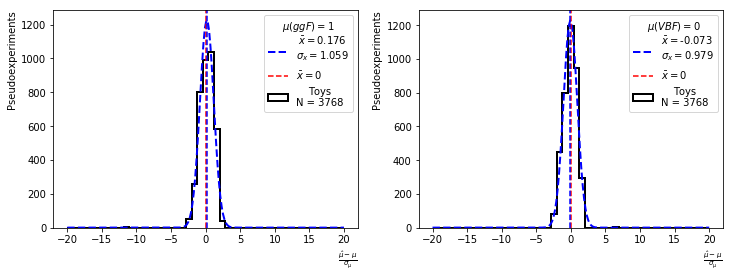

(1, 1)
(0, 3.5943334672574565, 5.236252307891846, 3.5943334102630615)
(1, -2.1578289755333735, 5.236252307891846, 3.5943334102630615)
(2, 10.80420522999517, 5.236252307891846, 3.5943334102630615)
(3, 3.5943334672574565, 5.236252307891846, 3.5943334102630615)
(4, -3.3193515434345926, 9.198827743530273, -3.3193514347076416)
(5, -8.498123967122954, 9.198827743530273, -3.3193514347076416)
(6, 1.6980671853597773, 9.198827743530273, -3.3193514347076416)
(7, -3.3193515434345926, 9.198827743530273, -3.3193514347076416)
(8, 1.7766905261067905, 0.9373820424079895, 1.7766904830932617)
(9, -1.6381381658880834, 0.9373820424079895, 1.7766904830932617)
(10, 5.934666361321906, 0.9373820424079895, 1.7766904830932617)
(11, 1.7766905261067905, 0.9373820424079895, 1.7766904830932617)
(12, 3.7019766608853217, -1.3944100141525269, 3.701976776123047)
(13, 0.36037675538077707, -1.3944100141525269, 3.701976776123047)
(14, 8.201224964034406, -1.3944100141525269, 3.701976776123047)
(15, 3.7019766608853217, -1.39

(1087, -5.372319543878945, 2.3789424896240234, -5.37231969833374)
(1088, 5.297519423742216, -3.323160409927368, 5.297519207000732)
(1089, 1.1676264688024283, -3.323160409927368, 5.297519207000732)
(1090, 10.848624371879323, -3.323160409927368, 5.297519207000732)
(1091, 5.297519423742216, -3.323160409927368, 5.297519207000732)
(1092, 1.7424943074997543, 9.340673446655273, 1.7424943447113037)
(1093, -3.5133262753649914, 9.340673446655273, 1.7424943447113037)
(1094, 7.844787868824428, 9.340673446655273, 1.7424943447113037)
(1095, 1.7424943074997543, 9.340673446655273, 1.7424943447113037)
(1096, -0.2137126896288919, 1.7852120399475098, -0.2137126922607422)
(1097, -3.5839906100118695, 1.7852120399475098, -0.2137126922607422)
(1098, 3.485666634614504, 1.7852120399475098, -0.2137126922607422)
(1099, -0.2137126896288919, 1.7852120399475098, -0.2137126922607422)
(1100, 2.3750881612635766, -2.235445976257324, 2.3750882148742676)
(1101, -0.6548166861018871, -2.235445976257324, 2.3750882148742676)

(2032, 5.150405294075242, -0.6912180781364441, 5.150405406951904)
(2033, 0.8159384822028084, -0.6912180781364441, 5.150405406951904)
(2034, 11.150534635926434, -0.6912180781364441, 5.150405406951904)
(2035, 5.150405294075242, -0.6912180781364441, 5.150405406951904)
(2036, -6.458348570502807, 3.3773491382598877, -6.458348751068115)
(2037, -11.122850567831156, 3.3773491382598877, -6.458348751068115)
(2038, -2.63006490435239, 3.3773491382598877, -6.458348751068115)
(2039, -6.458348570502807, 3.3773491382598877, -6.458348751068115)
(2040, 2.9996789045782464, 0.47287291288375854, 2.99967885017395)
(2041, 0.5576197521573847, 0.47287291288375854, 2.99967885017395)
(2042, 6.239811694485481, 0.47287291288375854, 2.99967885017395)
(2043, 2.9996789045782464, 0.47287291288375854, 2.99967885017395)
(2044, -5.052276846108256, 11.283677101135254, -5.052276611328125)
(2045, -9.168939664811584, 11.283677101135254, -5.052276611328125)
(2046, -1.5141160274563954, 11.283677101135254, -5.052276611328125)
(

(2867, 3.0611682901824366, -4.915971755981445, 3.0611681938171387)
(2868, -1.3938033149313043, 9.115077018737793, -1.393803358078003)
(2869, -5.810130375773092, 9.115077018737793, -1.393803358078003)
(2870, 3.0082564707577593, 9.115077018737793, -1.393803358078003)
(2871, -1.3938033149313043, 9.115077018737793, -1.393803358078003)
(2872, 1.2095838630170874, -0.5867666602134705, 1.2095838785171509)
(2873, -3.3857127458066127, -0.5867666602134705, 1.2095838785171509)
(2874, 7.04873903919987, -0.5867666602134705, 1.2095838785171509)
(2875, 1.2095838630170874, -0.5867666602134705, 1.2095838785171509)
(2876, 5.900252115928879, -9.406240463256836, 5.900252342224121)
(2877, 2.2354312001370604, -9.406240463256836, 5.900252342224121)
(2878, 10.977554246478542, -9.406240463256836, 5.900252342224121)
(2879, 5.900252115928879, -9.406240463256836, 5.900252342224121)
(2880, 5.5003521149737935, -3.165631055831909, 5.500351905822754)
(2881, -0.639300868797374, -3.165631055831909, 5.500351905822754)
(2

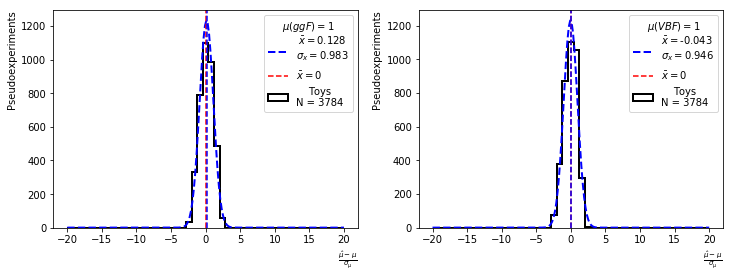

(1, 5)
(0, 0.39089407201562665, 8.520248413085938, 0.3908940851688385)
(1, -5.357874982479115, 8.520248413085938, 0.3908940851688385)
(2, 7.271216246246528, 8.520248413085938, 0.3908940851688385)
(3, 0.39089407201562665, 8.520248413085938, 0.3908940851688385)
(4, -1.4188505144129806, 11.168375015258789, -1.4188505411148071)
(5, -7.052097559366804, 11.168375015258789, -1.4188505411148071)
(6, 4.590214586300138, 11.168375015258789, -1.4188505411148071)
(7, -1.4188505144129806, 11.168375015258789, -1.4188505411148071)
(8, 1.9242878117241133, 3.0871050357818604, 1.9242877960205078)
(9, -1.160170621350586, 3.0871050357818604, 1.9242877960205078)
(10, 5.571641666962023, 3.0871050357818604, 1.9242877960205078)
(11, 1.9242878117241133, 3.0871050357818604, 1.9242877960205078)
(12, 2.2916147397524185, 6.905330657958984, 2.2916147708892822)
(13, -0.9902892404799717, 6.905330657958984, 2.2916147708892822)
(14, 6.5409564157134366, 6.905330657958984, 2.2916147708892822)
(15, 2.2916147397524185, 6.90

(1084, 0.8872950494896088, 6.083420276641846, 0.8872950673103333)
(1085, -2.239919314880218, 6.083420276641846, 0.8872950673103333)
(1086, 4.368972147866125, 6.083420276641846, 0.8872950673103333)
(1087, 0.8872950494896088, 6.083420276641846, 0.8872950673103333)
(1088, 5.569102494005307, -5.647575855255127, 5.5691022872924805)
(1089, 0.6361353459903345, -5.647575855255127, 5.5691022872924805)
(1090, 12.283458663239486, -5.647575855255127, 5.5691022872924805)
(1091, 5.569102494005307, -5.647575855255127, 5.5691022872924805)
(1092, 6.663471067359495, 4.853872776031494, 6.663471221923828)
(1093, 2.3971598405677383, 4.853872776031494, 6.663471221923828)
(1094, 12.150625390631605, 4.853872776031494, 6.663471221923828)
(1095, 6.663471067359495, 4.853872776031494, 6.663471221923828)
(1096, 6.246395482736062, -0.6328277587890625, 6.246395587921143)
(1097, -0.7017194300158351, -0.6328277587890625, 6.246395587921143)
(1098, 15.535096222495861, -0.6328277587890625, 6.246395587921143)
(1099, 6.246

(1979, 3.3461345197629555, 4.879520416259766, 3.3461344242095947)
(1980, 10.450775195216693, -0.8133686184883118, 10.450775146484375)
(1981, 5.770352452224035, -0.8133686184883118, 10.450775146484375)
(1982, 17.079487777678864, -0.8133686184883118, 10.450775146484375)
(1983, 10.450775195216693, -0.8133686184883118, 10.450775146484375)
(1984, 10.175903456541846, -0.5040777325630188, 10.1759033203125)
(1985, 5.790113625490743, -0.5040777325630188, 10.1759033203125)
(1986, 16.20920062149916, -0.5040777325630188, 10.1759033203125)
(1987, 10.175903456541846, -0.5040777325630188, 10.1759033203125)
(1988, 7.176027849766072, 5.3982720375061035, 7.176027774810791)
(1989, 2.770668555555307, 5.3982720375061035, 7.176027774810791)
(1990, 13.283059767582131, 5.3982720375061035, 7.176027774810791)
(1991, 7.176027849766072, 5.3982720375061035, 7.176027774810791)
(1992, 17.282709005664998, -13.576314926147461, 17.2827091217041)
(1993, 9.879322066333945, -13.576314926147461, 17.2827091217041)
(1994, 28

(2914, 3.9886675218020224, 9.512733459472656, 0.5614059567451477)
(2915, 0.5614059754521605, 9.512733459472656, 0.5614059567451477)
(2916, 18.219443452609724, -2.6869049072265625, 18.219444274902344)
(2917, 11.441118451131873, -2.6869049072265625, 18.219444274902344)
(2918, 27.99516750968016, -2.6869049072265625, 18.219444274902344)
(2919, 18.219443452609724, -2.6869049072265625, 18.219444274902344)
(2920, 10.677658271176924, -5.1920013427734375, 10.677658081054688)
(2921, 5.894994953699765, -5.1920013427734375, 10.677658081054688)
(2922, 17.53069553334412, -5.1920013427734375, 10.677658081054688)
(2923, 10.677658271176924, -5.1920013427734375, 10.677658081054688)
(2924, 4.591939227562378, -1.4634453058242798, 4.591939449310303)
(2925, 2.3567398193864304, -1.4634453058242798, 4.591939449310303)
(2926, 7.94589031675244, -1.4634453058242798, 4.591939449310303)
(2927, 4.591939227562378, -1.4634453058242798, 4.591939449310303)
(2928, -6.072994171951137, -1.960897445678711, -6.0729942321777

(3795, 12.031483460862972, -6.0269575119018555, 12.03148365020752)
(3796, 1.1576336543188859, -1.2384814023971558, 1.157633662223816)
(3797, -1.6002259137773063, -1.2384814023971558, 1.157633662223816)
(3798, 4.500965157585229, -1.2384814023971558, 1.157633662223816)
(3799, 1.1576336543188859, -1.2384814023971558, 1.157633662223816)
(3800, 0.27092961690127026, -9.783864974975586, 0.27092960476875305)
(3801, -6.770066841566456, -9.783864974975586, 0.27092960476875305)
(3802, 8.186489155286228, -9.783864974975586, 0.27092960476875305)
(3803, 0.27092961690127026, -9.783864974975586, 0.27092960476875305)
(3804, 11.689628515593611, -6.215085983276367, 11.689628601074219)
(3805, 4.037883814549705, -6.215085983276367, 11.689628601074219)
(3806, 23.262816263681465, -6.215085983276367, 11.689628601074219)
(3807, 11.689628515593611, -6.215085983276367, 11.689628601074219)
(3808, 7.3166118041995105, 0.9841626286506653, 7.3166117668151855)
(3809, 2.112977574218366, 0.9841626286506653, 7.3166117668

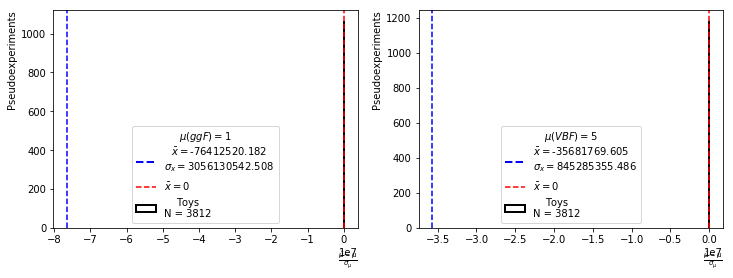

(1, 10)
(0, 14.91594684563718, 5.171908855438232, 14.915946960449219)
(1, 6.958889917758576, 5.171908855438232, 14.915946960449219)
(2, 25.886537484358072, 5.171908855438232, 14.915946960449219)
(3, 14.91594684563718, 5.171908855438232, 14.915946960449219)
(4, 6.986858289847802, 6.578924655914307, 6.986858367919922)
(5, 1.3956083490502467, 6.578924655914307, 6.986858367919922)
(6, 14.98423650675574, 6.578924655914307, 6.986858367919922)
(7, 6.986858289847802, 6.578924655914307, 6.986858367919922)
(8, 12.252082289908287, -3.9969568252563477, 12.252081871032715)
(9, 7.967764898439291, -3.9969568252563477, 12.252081871032715)
(10, 18.20437941783203, -3.9969568252563477, 12.252081871032715)
(11, 12.252082289908287, -3.9969568252563477, 12.252081871032715)
(12, 13.660113153020276, 0.17518222332000732, 13.660113334655762)
(13, 8.079678384922198, 0.17518222332000732, 13.660113334655762)
(14, 20.90061279792756, 0.17518222332000732, 13.660113334655762)
(15, 13.660113153020276, 0.175182223320007

(1147, 6.521722605787687, 4.455398082733154, 6.521722793579102)
(1148, 23.907204140151507, -8.069713592529297, 23.907203674316406)
(1149, 16.01438103440224, -8.069713592529297, 23.907203674316406)
(1150, 34.78853588942962, -8.069713592529297, 23.907203674316406)
(1151, 23.907204140151507, -8.069713592529297, 23.907203674316406)
(1152, -0.16330266440301955, 16.70305824279785, -0.16330265998840332)
(1153, -6.420701224499579, 16.70305824279785, -0.16330265998840332)
(1154, 6.179996792574689, 16.70305824279785, -0.16330265998840332)
(1155, -0.16330266440301955, 16.70305824279785, -0.16330265998840332)
(1156, 29.915753558346978, -8.481316566467285, 29.915754318237305)
(1157, 18.425701628950993, -8.481316566467285, 29.915754318237305)
(1158, 45.43079243572215, -8.481316566467285, 29.915754318237305)
(1159, 29.915753558346978, -8.481316566467285, 29.915754318237305)
(1160, 18.652827175645086, 1.6469324827194214, 18.6528263092041)
(1161, 10.864125746832427, 1.6469324827194214, 18.6528263092041

(2038, 21.40270418778834, -4.507978916168213, 14.168485641479492)
(2039, 14.168485321260334, -4.507978916168213, 14.168485641479492)
(2040, 10.025142813185312, 1.5920287370681763, 10.025142669677734)
(2041, 4.957249143478309, 1.5920287370681763, 10.025142669677734)
(2042, 17.093702420293376, 1.5920287370681763, 10.025142669677734)
(2043, 10.025142813185312, 1.5920287370681763, 10.025142669677734)
(2044, 9.598434543171535, 3.6646041870117188, 9.598434448242188)
(2045, 4.507426054160032, 3.6646041870117188, 9.598434448242188)
(2046, 17.492113336201815, 3.6646041870117188, 9.598434448242188)
(2047, 9.598434543171535, 3.6646041870117188, 9.598434448242188)
(2048, 6.477772766306629, 0.5143055319786072, 6.4777727127075195)
(2049, 1.2848239515333955, 0.5143055319786072, 6.4777727127075195)
(2050, 13.258764716523642, 0.5143055319786072, 6.4777727127075195)
(2051, 6.477772766306629, 0.5143055319786072, 6.4777727127075195)
(2052, 22.41688465600342, -4.878951072692871, 22.416885375976562)
(2053, 

(2978, 33.578142087997094, -6.414305210113525, 22.272809982299805)
(2979, 22.272809341222356, -6.414305210113525, 22.272809982299805)
(2980, 9.42457703807591, -4.615350723266602, 9.424576759338379)
(2981, 4.336021085941724, -4.615350723266602, 9.424576759338379)
(2982, 16.756063823498977, -4.615350723266602, 9.424576759338379)
(2983, 9.42457703807591, -4.615350723266602, 9.424576759338379)
(2984, 13.23433556425914, -1.1518622636795044, 13.234335899353027)
(2985, 8.284739369785626, -1.1518622636795044, 13.234335899353027)
(2986, 20.36956974940677, -1.1518622636795044, 13.234335899353027)
(2987, 13.23433556425914, -1.1518622636795044, 13.234335899353027)
(2988, 3.1385180281344276, 7.857855796813965, 3.1385180950164795)
(2989, -4.749872516568026, 7.857855796813965, 3.1385180950164795)
(2990, 12.855105582296869, 7.857855796813965, 3.1385180950164795)
(2991, 3.1385180281344276, 7.857855796813965, 3.1385180950164795)
(2992, 16.334600711236604, -4.686767101287842, 16.3346004486084)
(2993, 8.9

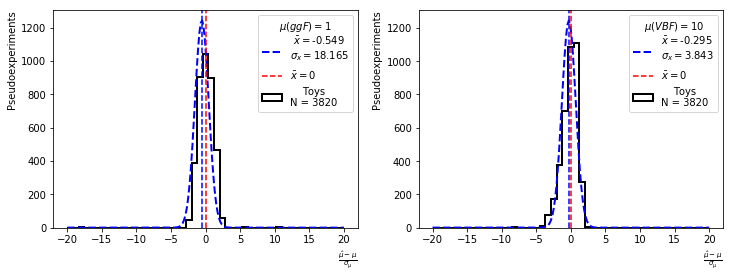

(1, 15)
(0, 19.920761315549925, 6.437714576721191, 19.920761108398438)
(1, 11.266929327640211, 6.437714576721191, 19.920761108398438)
(2, 32.22453930639243, 6.437714576721191, 19.920761108398438)
(3, 19.920761315549925, 6.437714576721191, 19.920761108398438)
(4, -1.0437203157544843, 16.507610321044922, -1.0437203645706177)
(5, -6.293515303771119, 16.507610321044922, -1.0437203645706177)
(6, 4.925870685462829, 16.507610321044922, -1.0437203645706177)
(7, -1.0437203157544843, 16.507610321044922, -1.0437203645706177)
(8, 8.716270077128144, -4.828493118286133, 8.716270446777344)
(9, 4.196610844011025, -4.828493118286133, 8.716270446777344)
(10, 14.833975990690515, -4.828493118286133, 8.716270446777344)
(11, 8.716270077128144, -4.828493118286133, 8.716270446777344)
(12, 10.68309147891216, 5.301263332366943, 10.683091163635254)
(13, 6.66735217472856, 5.301263332366943, 10.683091163635254)
(14, 16.193395052715445, 5.301263332366943, 10.683091163635254)
(15, 10.68309147891216, 5.30126333236694

(882, 18.883613829138007, 4.012499809265137, 12.95617389678955)
(883, 12.956174052012301, 4.012499809265137, 12.95617389678955)
(884, 16.881636963440855, -4.7297468185424805, 16.881637573242188)
(885, 9.851896390896567, -4.7297468185424805, 16.881637573242188)
(886, 27.007598686322424, -4.7297468185424805, 16.881637573242188)
(887, 16.881636963440855, -4.7297468185424805, 16.881637573242188)
(888, 4.793366419193617, 4.36937952041626, 4.793366432189941)
(889, 0.3342582441445563, 4.36937952041626, 4.793366432189941)
(890, 10.80206593958584, 4.36937952041626, 4.793366432189941)
(891, 4.793366419193617, 4.36937952041626, 4.793366432189941)
(892, 10.126313808401562, -3.3699791431427, 10.126314163208008)
(893, 4.411065547905288, -3.3699791431427, 10.126314163208008)
(894, 18.16372896862979, -3.3699791431427, 10.126314163208008)
(895, 10.126313808401562, -3.3699791431427, 10.126314163208008)
(896, 14.142909211095528, 4.553497791290283, 14.142909049987793)
(897, 7.5563104025300145, 4.553497791

(1932, 11.49976519869962, 8.381119728088379, 11.499765396118164)
(1933, 5.7485529499355, 8.381119728088379, 11.499765396118164)
(1934, 19.68622724657027, 8.381119728088379, 11.499765396118164)
(1935, 11.49976519869962, 8.381119728088379, 11.499765396118164)
(1936, 21.402409898185354, -5.275337219238281, 21.40241050720215)
(1937, 11.856228258561147, -5.275337219238281, 21.40241050720215)
(1938, 34.336285920913475, -5.275337219238281, 21.40241050720215)
(1939, 21.402409898185354, -5.275337219238281, 21.40241050720215)
(1940, 7.379460892189812, 4.336865425109863, 7.37946081161499)
(1941, 3.789727088618992, 4.336865425109863, 7.37946081161499)
(1942, 12.204308233943342, 4.336865425109863, 7.37946081161499)
(1943, 7.379460892189812, 4.336865425109863, 7.37946081161499)
(1944, 37.22062748281928, -14.865175247192383, 37.22062683105469)
(1945, 19.864053954369144, -14.865175247192383, 37.22062683105469)
(1946, 63.73344967021626, -14.865175247192383, 37.22062683105469)
(1947, 37.22062748281928, 

(2799, 2.5734387592332837, 16.20304298400879, 2.5734386444091797)
(2800, 15.758889202209758, -3.9149529933929443, 15.758889198303223)
(2801, 10.565487996544476, -3.9149529933929443, 15.758889198303223)
(2802, 22.837644911983453, -3.9149529933929443, 15.758889198303223)
(2803, 15.758889202209758, -3.9149529933929443, 15.758889198303223)
(2804, 15.964965286123928, 8.333121299743652, 15.964964866638184)
(2805, 8.108425937103192, 8.333121299743652, 15.964964866638184)
(2806, 28.62644426798444, 8.333121299743652, 15.964964866638184)
(2807, 15.964965286123928, 8.333121299743652, 15.964964866638184)
(2808, 18.13230798564547, -3.075486183166504, 18.132307052612305)
(2809, 10.975729842165853, -3.075486183166504, 18.132307052612305)
(2810, 29.058972300377544, -3.075486183166504, 18.132307052612305)
(2811, 18.13230798564547, -3.075486183166504, 18.132307052612305)
(2812, 17.51939467270465, 0.7623468041419983, 17.519393920898438)
(2813, 10.071613411965435, 0.7623468041419983, 17.519393920898438)
(

(3710, 42.06391691856785, -3.600747585296631, 26.429445266723633)
(3711, 26.4294452530263, -3.600747585296631, 26.429445266723633)
(3712, 14.046882070910513, 2.0130300521850586, 14.046881675720215)
(3713, 7.811858079632574, 2.0130300521850586, 14.046881675720215)
(3714, 23.02660470318309, 2.0130300521850586, 14.046881675720215)
(3715, 14.046882070910513, 2.0130300521850586, 14.046881675720215)
(3716, 13.209678528050688, 2.489849328994751, 13.209678649902344)
(3717, 8.43636240985192, 2.489849328994751, 13.209678649902344)
(3718, 19.85617405508577, 2.489849328994751, 13.209678649902344)
(3719, 13.209678528050688, 2.489849328994751, 13.209678649902344)
(3720, 6.786492036819894, 6.244833946228027, 6.786491870880127)
(3721, 4.136741491559304, 6.244833946228027, 6.786491870880127)
(3722, 10.508238984916822, 6.244833946228027, 6.786491870880127)
(3723, 6.786492036819894, 6.244833946228027, 6.786491870880127)
(3724, 25.376732988044964, -4.382505416870117, 25.376733779907227)
(3725, 17.42168386

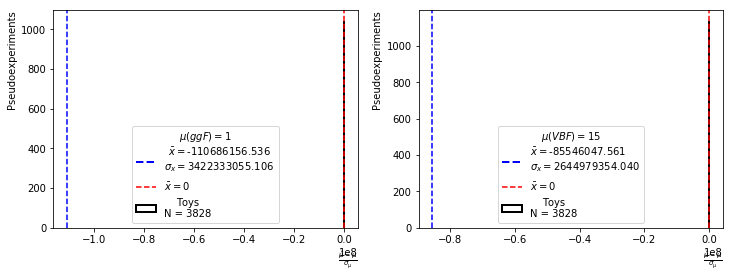

(1, 20)
(0, 34.814133800840466, 3.6250123977661133, 34.81413269042969)
(1, 23.14425369450038, 3.6250123977661133, 34.81413269042969)
(2, 51.3318713861256, 3.6250123977661133, 34.81413269042969)
(3, 34.814133800840466, 3.6250123977661133, 34.81413269042969)
(4, 11.148163410834826, 8.150030136108398, 11.148163795471191)
(5, 4.77539214055335, 8.150030136108398, 11.148163795471191)
(6, 20.105106765989465, 8.150030136108398, 11.148163795471191)
(7, 11.148163410834826, 8.150030136108398, 11.148163795471191)
(8, 19.863445022446612, -4.097112655639648, 19.863445281982422)
(9, 13.536685911983165, -4.097112655639648, 19.863445281982422)
(10, 29.339157776821928, -4.097112655639648, 19.863445281982422)
(11, 19.863445022446612, -4.097112655639648, 19.863445281982422)
(12, 18.19249541741486, 2.3429934978485107, 18.192495346069336)
(13, 12.33236553834127, 2.3429934978485107, 18.192495346069336)
(14, 26.357361597063615, 2.3429934978485107, 18.192495346069336)
(15, 18.19249541741486, 2.3429934978485107

(944, 14.50506028495171, 7.742593288421631, 14.505060195922852)
(945, 8.957136192052271, 7.742593288421631, 14.505060195922852)
(946, 22.301988747883165, 7.742593288421631, 14.505060195922852)
(947, 14.50506028495171, 7.742593288421631, 14.505060195922852)
(948, 14.515623186187199, 1.5485299825668335, 14.515623092651367)
(949, 6.30475238595986, 1.5485299825668335, 14.515623092651367)
(950, 26.389891146577046, 1.5485299825668335, 14.515623092651367)
(951, 14.515623186187199, 1.5485299825668335, 14.515623092651367)
(952, 28.548836052130497, -4.358260631561279, 28.54883575439453)
(953, 19.26001546677467, -4.358260631561279, 28.54883575439453)
(954, 41.58111802986452, -4.358260631561279, 28.54883575439453)
(955, 28.548836052130497, -4.358260631561279, 28.54883575439453)
(956, 17.57542179802381, 3.075845956802368, 17.575422286987305)
(957, 10.950586184704651, 3.075845956802368, 17.575422286987305)
(958, 27.11774307921913, 3.075845956802368, 17.575422286987305)
(959, 17.57542179802381, 3.075

(2145, 14.490501459048126, -1.698727011680603, 21.733722686767578)
(2146, 32.6505157731637, -1.698727011680603, 21.733722686767578)
(2147, 21.733722342547424, -1.698727011680603, 21.733722686767578)
(2148, 3.4815773201899702, 16.190858840942383, 3.4815773963928223)
(2149, -3.4223751974058576, 16.190858840942383, 3.4815773963928223)
(2150, 11.158907758802988, 16.190858840942383, 3.4815773963928223)
(2151, 3.4815773201899702, 16.190858840942383, 3.4815773963928223)
(2152, 11.468407300292768, 4.688982009887695, 11.46840763092041)
(2153, 5.144360288283113, 4.688982009887695, 11.46840763092041)
(2154, 20.34330880720981, 4.688982009887695, 11.46840763092041)
(2155, 11.468407300292768, 4.688982009887695, 11.46840763092041)
(2156, 11.71468462183563, 3.6618540287017822, 11.71468448638916)
(2157, 7.508872919218708, 3.6618540287017822, 11.71468448638916)
(2158, 17.73987936731652, 3.6618540287017822, 11.71468448638916)
(2159, 11.71468462183563, 3.6618540287017822, 11.71468448638916)
(2160, 20.3054

(3160, 25.403271749558073, -7.9527788162231445, 25.40327262878418)
(3161, 17.36333241255199, -7.9527788162231445, 25.40327262878418)
(3162, 36.907004030289116, -7.9527788162231445, 25.40327262878418)
(3163, 25.403271749558073, -7.9527788162231445, 25.40327262878418)
(3164, 8.95524883102361, 9.6718111038208, 8.955248832702637)
(3165, 4.0004520635701635, 9.6718111038208, 8.955248832702637)
(3166, 15.579317001634694, 9.6718111038208, 8.955248832702637)
(3167, 8.95524883102361, 9.6718111038208, 8.955248832702637)
(3168, 30.278271502974405, 0.3328969478607178, 30.278270721435547)
(3169, 18.72356420726172, 0.3328969478607178, 30.278270721435547)
(3170, 48.34358577429464, 0.3328969478607178, 30.278270721435547)
(3171, 30.278271502974405, 0.3328969478607178, 30.278270721435547)
(3172, 13.49236007565024, 5.189188480377197, 13.49236011505127)
(3173, 8.233576842186412, 5.189188480377197, 13.49236011505127)
(3174, 21.258259607483335, 5.189188480377197, 13.49236011505127)
(3175, 13.49236007565024, 

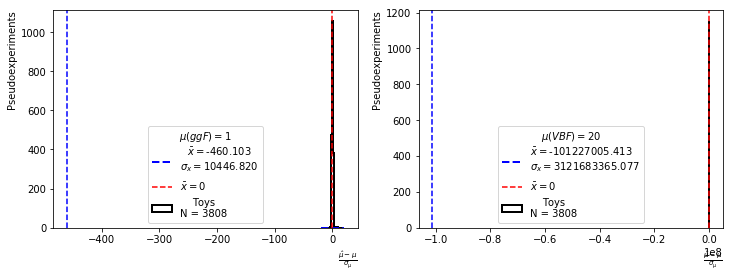

(1, 25)
(0, 44.36303840695038, 4.706692218780518, 44.363037109375)
(1, 30.817898369488507, 4.706692218780518, 44.363037109375)
(2, 63.509283534239195, 4.706692218780518, 44.363037109375)
(3, 44.36303840695038, 4.706692218780518, 44.363037109375)
(4, 22.586296910628434, -8.216307640075684, 22.58629608154297)
(5, -100.0, -8.216307640075684, 22.58629608154297)
(6, 100.0, -8.216307640075684, 22.58629608154297)
(7, 22.586296910628434, -8.216307640075684, 22.58629608154297)
(8, 20.367787293277686, 4.768661975860596, 20.367786407470703)
(9, 8.40486487139705, 4.768661975860596, 20.367786407470703)
(10, 35.17181723013404, 4.768661975860596, 20.367786407470703)
(11, 20.367787293277686, 4.768661975860596, 20.367786407470703)
(12, 15.016960170210396, 4.089394569396973, 15.016960144042969)
(13, 9.506638069778445, 4.089394569396973, 15.016960144042969)
(14, 22.713111840827604, 4.089394569396973, 15.016960144042969)
(15, 15.016960170210396, 4.089394569396973, 15.016960144042969)
(16, 24.0240393629236

(1069, 20.056338047740084, -5.1250739097595215, 28.386337280273438)
(1070, 39.4818155632642, -5.1250739097595215, 28.386337280273438)
(1071, 28.386337356275334, -5.1250739097595215, 28.386337280273438)
(1072, 11.794773156286581, 7.723198890686035, 11.79477310180664)
(1073, 6.13600749639806, 7.723198890686035, 11.79477310180664)
(1074, 19.67604549778567, 7.723198890686035, 11.79477310180664)
(1075, 11.794773156286581, 7.723198890686035, 11.79477310180664)
(1076, 35.525275645643916, -5.978046417236328, 35.52527618408203)
(1077, 24.14638285759799, -5.978046417236328, 35.52527618408203)
(1078, 51.41848540589501, -5.978046417236328, 35.52527618408203)
(1079, 35.525275645643916, -5.978046417236328, 35.52527618408203)
(1080, 48.44876312329268, -13.571650505065918, 48.44876480102539)
(1081, 35.89030199424701, -13.571650505065918, 48.44876480102539)
(1082, 65.25939448527936, -13.571650505065918, 48.44876480102539)
(1083, 48.44876312329268, -13.571650505065918, 48.44876480102539)
(1084, 21.15709

(2145, 15.372825689230009, -0.07318783551454544, 22.23941421508789)
(2146, 31.744501126346137, -0.07318783551454544, 22.23941421508789)
(2147, 22.239413783682195, -0.07318783551454544, 22.23941421508789)
(2148, 23.103449832467632, -2.522733688354492, 23.103450775146484)
(2149, 15.30688966241939, -2.522733688354492, 23.103450775146484)
(2150, 34.58377746870734, -2.522733688354492, 23.103450775146484)
(2151, 23.103449832467632, -2.522733688354492, 23.103450775146484)
(2152, 37.82738146531918, 3.3217098712921143, 37.8273811340332)
(2153, 24.23919282254774, 3.3217098712921143, 37.8273811340332)
(2154, 58.25855061148622, 3.3217098712921143, 37.8273811340332)
(2155, 37.82738146531918, 3.3217098712921143, 37.8273811340332)
(2156, 12.777786702449262, 5.838940143585205, 12.777786254882812)
(2157, 7.955954968573411, 5.838940143585205, 12.777786254882812)
(2158, 19.38641178962867, 5.838940143585205, 12.777786254882812)
(2159, 12.777786702449262, 5.838940143585205, 12.777786254882812)
(2160, 34.41

(3090, 31.164520248325644, -2.084822416305542, 17.25476837158203)
(3091, 17.254767493327947, -2.084822416305542, 17.25476837158203)
(3092, 34.15334500005608, -4.63082218170166, 34.153343200683594)
(3093, 23.902727368352625, -4.63082218170166, 34.153343200683594)
(3094, 47.85596388336404, -4.63082218170166, 34.153343200683594)
(3095, 34.15334500005608, -4.63082218170166, 34.153343200683594)
(3096, 18.85759925672272, 3.17069411277771, 18.85759925842285)
(3097, 12.730532907239093, 3.17069411277771, 18.85759925842285)
(3098, 27.9214432834732, 3.17069411277771, 18.85759925842285)
(3099, 18.85759925672272, 3.17069411277771, 18.85759925842285)
(3100, 46.836472193506665, -0.2417791187763214, 46.83647155761719)
(3101, 34.0867878922304, -0.2417791187763214, 46.83647155761719)
(3102, 63.50663678341685, -0.2417791187763214, 46.83647155761719)
(3103, 46.836472193506665, -0.2417791187763214, 46.83647155761719)
(3104, 41.250350864816625, -3.3388452529907227, 41.25035095214844)
(3105, 28.2406354379249

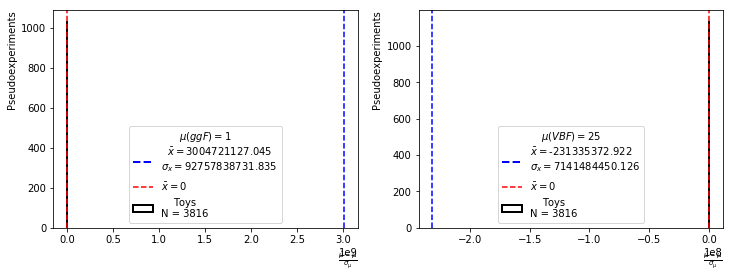

In [5]:
proc = "VBF"
for mu in [0,1,5,10,15,20,25]:
    draw_bias(proc,mu)